In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.731323764958276 -100.6957134947771
82.07445211338035 -98.62838201207026
15.021084740052657 14.122575011552755
10.828813772864962 -28.81002965895749
-6.694925898428011 -30.259961542631345
47.234161846744 179.60615573435012
77.691338786031 -103.13954175059253
89.40852135015848 -163.1051826438827
18.26480053245257 -139.0279324086669
4.737415225583177 25.31318512395677
-33.69004950051987 -141.3653937987053
18.61819455576574 150.50739449104287
-49.05127602965963 -104.20857595142515
-81.02015644752598 101.39845103535458
-22.01945954965666 54.68692538607999
-20.14213738581796 -54.79214884315448
-76.61861655407543 -33.844875413691426
-14.321885106666997 44.229594128469216
84.76254972896612 48.683397525793794
7.054585579371647 -157.1931591457322
-85.59791996632826 -105.38718702178934
89.46046957909272 -136.2221898513415
-41.064432545543774 138.45543010645355
-45.345259579540205 58.72172152436298
-21.89415501057698 61.905057367549574
-26.76991598466691 71.87001025144966
71.24383754690126 -71.

15.38628670174586 65.55856022058492
86.0949178059866 139.92417054490977
82.05095314166442 -80.7238545798435
49.592294767198496 49.78467509939662
-46.067233725004165 92.25184073903131
-29.258637658778547 -133.8649856875279
-72.56265492711097 -120.61924795415632
40.80686391021757 110.4486987261609
-58.69867129847662 -80.17471315816906
-76.15462595782849 30.983913804584887
72.9909323058375 108.0695277883911
-66.04180513273184 -78.32141892731387
-2.736210453504043 1.0634474590347054
40.21649071144466 -114.0032647202262
61.29461679041938 -64.2678522216088
83.74222485644503 143.23207146758608
73.56836589355373 -101.99737333917871
22.33889245871441 -6.994394124691013
13.174461450238098 -125.24952146820205
31.245587237674286 125.26754477748113
23.087673318279485 -159.5017250026535
7.149543127544746 -45.33908329197135
-82.48518420289616 60.21780984279658
-70.62436630977089 31.865763565518762
80.84447725373101 -20.87984667760972
0.2947502985099959 -11.628464778935864
54.19501659494043 -30.431221

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
cities


['san angelo',
 'yellowknife',
 'mao',
 'sao filipe',
 'cabedelo',
 'nikolskoye',
 'barrow',
 'hilo',
 'zemio',
 'rikitea',
 'katsuura',
 'castro',
 'albany',
 'saint-louis',
 'terenos',
 'ushuaia',
 'boueni',
 'belushya guba',
 'punta arenas',
 'tuktoyaktuk',
 'mount gambier',
 'taolanaro',
 'bambous virieux',
 'clyde river',
 'narsaq',
 'bredasdorp',
 'lithgow',
 'poplar bluff',
 'samalaeulu',
 'coquimbo',
 'butaritari',
 'mataura',
 'codrington',
 'salinopolis',
 'kalmar',
 'port blair',
 'pokhara',
 'norman wells',
 'kamenskoye',
 'longyearbyen',
 'illoqqortoormiut',
 'nazret',
 'cabo san lucas',
 'richard toll',
 'pierre',
 'grand river south east',
 'kapaa',
 'bilma',
 'vaini',
 'tiksi',
 'zaranj',
 'nizhnevartovsk',
 'hualmay',
 'vytegra',
 'visnes',
 'takoradi',
 'san miguel',
 'rawson',
 'cape town',
 'nishihara',
 'garowe',
 'gilgit',
 'kavieng',
 'kaitangata',
 'iquitos',
 'atuona',
 'camiri',
 'isla mujeres',
 'christchurch',
 'jamestown',
 'asfi',
 'new norfolk',
 'thompso

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60e3390eacf7d689fb8fed220594f948


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san angelo
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | mao
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | cabedelo
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | zemio
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | saint-louis
Processing Record 15 of Set 1 | terenos
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | boueni
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | taolanaro
City not fou

Processing Record 37 of Set 4 | slave lake
Processing Record 38 of Set 4 | daru
Processing Record 39 of Set 4 | sterling
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | shitkino
Processing Record 43 of Set 4 | maceio
Processing Record 44 of Set 4 | midyat
Processing Record 45 of Set 4 | coro
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | quesnel
Processing Record 48 of Set 4 | bogorodskoye
Processing Record 49 of Set 4 | magistralnyy
Processing Record 50 of Set 4 | mehran
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | bayanday
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | florida
Processing Record 7 of Set 5 | luena
Processing Record 8 of Set 5 | acapulco
Processing Record 9 of Set 5 | sept-iles
Processing Record 10 of Set 5 | toliary
City not found. 

Processing Record 26 of Set 8 | krasnoselkup
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | sobolevo
Processing Record 30 of Set 8 | riberalta
Processing Record 31 of Set 8 | torbay
Processing Record 32 of Set 8 | caramay
Processing Record 33 of Set 8 | kodiak
Processing Record 34 of Set 8 | san isidro
Processing Record 35 of Set 8 | achacachi
Processing Record 36 of Set 8 | san vicente
Processing Record 37 of Set 8 | lyubim
Processing Record 38 of Set 8 | yanan
City not found. Skipping...
Processing Record 39 of Set 8 | atar
Processing Record 40 of Set 8 | ventnor city
Processing Record 41 of Set 8 | sonamura
Processing Record 42 of Set 8 | iberia
Processing Record 43 of Set 8 | warragul
Processing Record 44 of Set 8 | gari
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | mogadishu
Processing Record 47 of Set 8 | boyolangu
Processing Record 48 of Set 8 | abiy adi
City not found. Skipping.

Processing Record 14 of Set 12 | fereydun kenar
Processing Record 15 of Set 12 | batagay-alyta
Processing Record 16 of Set 12 | iralaya
Processing Record 17 of Set 12 | ouargaye
Processing Record 18 of Set 12 | skjervoy
Processing Record 19 of Set 12 | saint-pie
Processing Record 20 of Set 12 | podgornoye
Processing Record 21 of Set 12 | rocha
Processing Record 22 of Set 12 | staryy nadym
Processing Record 23 of Set 12 | cap malheureux
Processing Record 24 of Set 12 | wexford
Processing Record 25 of Set 12 | grenada
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | amahai
Processing Record 28 of Set 12 | elban
Processing Record 29 of Set 12 | cheyenne
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | kikwit
Processing Record 32 of Set 12 | peleduy
Processing Record 33 of Set 12 | gay
Processing Record 34 of Set 12 | omboue
Processing Record 35 of Set 12 | doka
Processing Record 36 of Set 12 | jatiroto
Processing Record 37 of Set 12 | jiaochen

In [11]:
len(city_data)

585

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Angelo,31.4638,-100.4370,90.95,33,0,11.99,US,2022-07-19 05:11:24
1,Yellowknife,62.4560,-114.3525,64.81,56,95,5.95,CA,2022-07-19 05:11:14
2,Mao,39.8885,4.2658,75.76,94,20,2.30,ES,2022-07-19 05:15:16
3,Sao Filipe,14.8961,-24.4956,75.07,83,97,9.46,CV,2022-07-19 05:15:16
4,Cabedelo,-6.9811,-34.8339,72.27,86,41,13.69,BR,2022-07-19 05:15:17
5,Nikolskoye,59.7035,30.7861,63.88,67,61,5.37,RU,2022-07-19 05:15:17
6,Barrow,71.2906,-156.7887,42.82,75,100,14.97,US,2022-07-19 05:15:18
7,Hilo,19.7297,-155.0900,78.28,93,100,9.22,US,2022-07-19 05:15:18
8,Zemio,5.0314,25.1361,68.04,99,100,3.09,CF,2022-07-19 05:15:19
9,Rikitea,-23.1203,-134.9692,74.48,74,4,12.80,PF,2022-07-19 05:15:19


In [13]:
#https://towardsdatascience.com/4-methods-for-changing-the-column-order-of-a-pandas-data-frame-a16cf0b58943
city_data_df.iloc[:, [0,7,8,1,2,3,4,5,6]]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Angelo,US,2022-07-19 05:11:24,31.4638,-100.4370,90.95,33,0,11.99
1,Yellowknife,CA,2022-07-19 05:11:14,62.4560,-114.3525,64.81,56,95,5.95
2,Mao,ES,2022-07-19 05:15:16,39.8885,4.2658,75.76,94,20,2.30
3,Sao Filipe,CV,2022-07-19 05:15:16,14.8961,-24.4956,75.07,83,97,9.46
4,Cabedelo,BR,2022-07-19 05:15:17,-6.9811,-34.8339,72.27,86,41,13.69
...,...,...,...,...,...,...,...,...,...
580,Camargo,MX,2022-07-19 05:30:46,27.6667,-105.1667,83.98,28,21,13.58
581,Anloga,GH,2022-07-19 05:28:07,5.7947,0.8973,75.56,81,66,12.55
582,Vestmannaeyjar,IS,2022-07-19 05:30:46,63.4427,-20.2734,50.20,90,100,7.52
583,Huilong,CN,2022-07-19 05:30:47,31.8111,121.6550,84.43,72,78,5.97


In [14]:
# Create the output file (CSV).
output_data_file = "C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

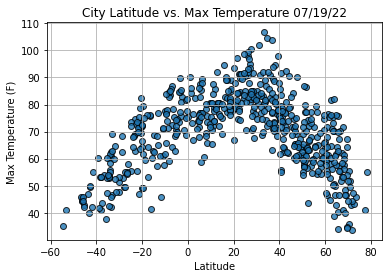

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

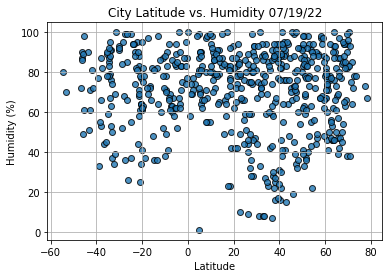

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

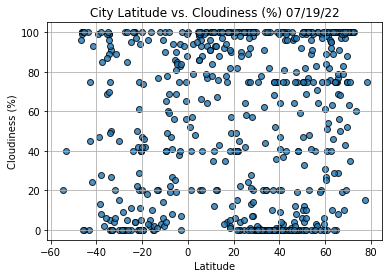

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

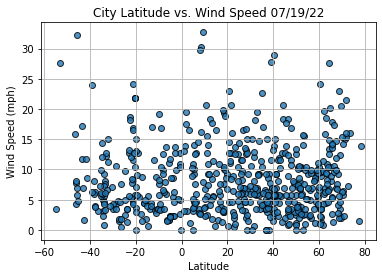

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                  Saint-Louis
Lat                       16.3333
Lng                         -15.0
Max Temp                    82.83
Humidity                       66
Cloudiness                     35
Wind Speed                  10.87
Country                        SN
Date          2022-07-19 05:15:20
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
580     True
581     True
582     True
583     True
584    False
Name: Lat, Length: 585, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Angelo,31.4638,-100.4370,90.95,33,0,11.99,US,2022-07-19 05:11:24
1,Yellowknife,62.4560,-114.3525,64.81,56,95,5.95,CA,2022-07-19 05:11:14
2,Mao,39.8885,4.2658,75.76,94,20,2.30,ES,2022-07-19 05:15:16
3,Sao Filipe,14.8961,-24.4956,75.07,83,97,9.46,CV,2022-07-19 05:15:16
5,Nikolskoye,59.7035,30.7861,63.88,67,61,5.37,RU,2022-07-19 05:15:17
...,...,...,...,...,...,...,...,...,...
579,Puerto Del Rosario,28.5004,-13.8627,71.35,83,20,12.66,ES,2022-07-19 05:30:45
580,Camargo,27.6667,-105.1667,83.98,28,21,13.58,MX,2022-07-19 05:30:46
581,Anloga,5.7947,0.8973,75.56,81,66,12.55,GH,2022-07-19 05:28:07
582,Vestmannaeyjar,63.4427,-20.2734,50.20,90,100,7.52,IS,2022-07-19 05:30:46


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Angelo,31.4638,-100.4370,90.95,33,0,11.99,US,2022-07-19 05:11:24
1,Yellowknife,62.4560,-114.3525,64.81,56,95,5.95,CA,2022-07-19 05:11:14
2,Mao,39.8885,4.2658,75.76,94,20,2.30,ES,2022-07-19 05:15:16
3,Sao Filipe,14.8961,-24.4956,75.07,83,97,9.46,CV,2022-07-19 05:15:16
5,Nikolskoye,59.7035,30.7861,63.88,67,61,5.37,RU,2022-07-19 05:15:17


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

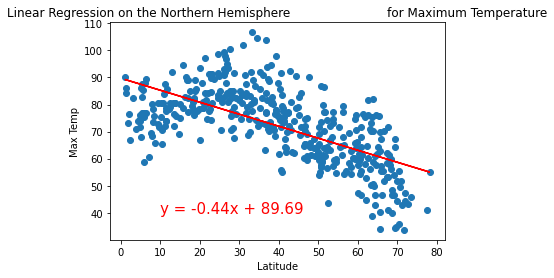

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

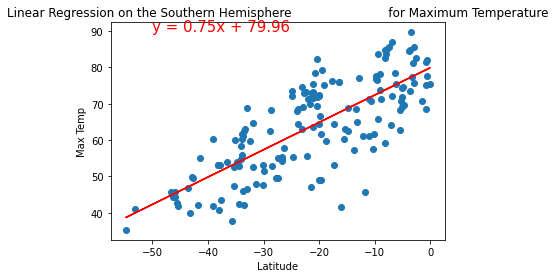

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

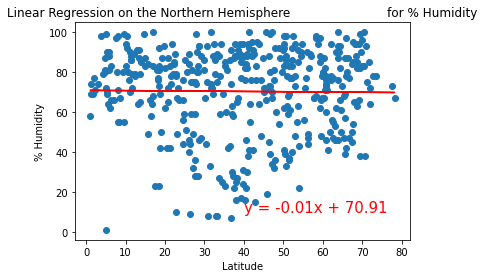

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

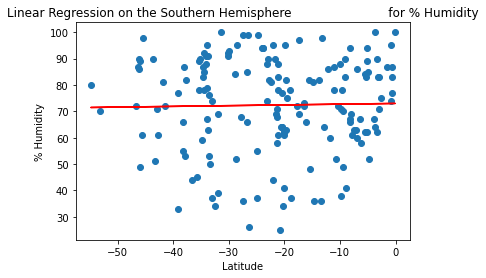

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

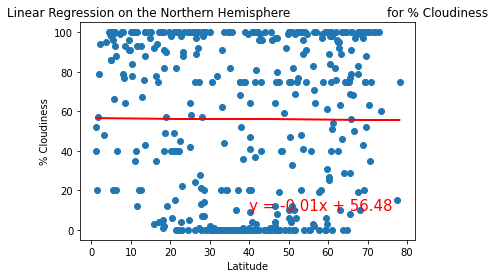

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

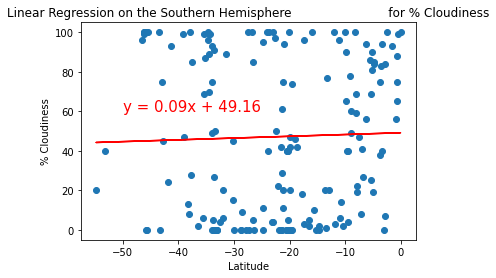

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

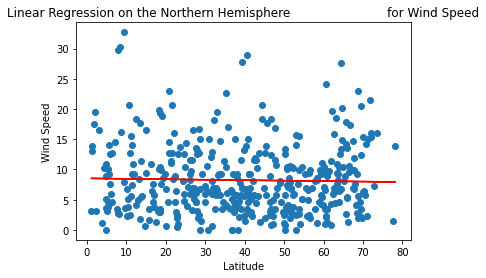

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

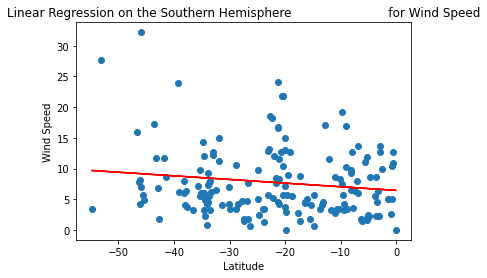

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))